#PROYECTO CORTE 2

Presentado por: Paula Andrea Bernal Castillo - 64191069

In [1]:
import numpy as np
import pandas as pd
!pip install wbgapi #instalando una librería del banco mundial
import wbgapi as wb #importando la librería del banco mundial
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from scipy import stats

import geopandas as gpd
!pip install rioxarray
import rioxarray
import xarray
import numpy as np
from numpy.random import seed
!pip install osmnx
import osmnx

from matplotlib import colors
from matplotlib.patches import Ellipse
import seaborn as sns
!pip install datashader
import datashader
!pip install contextily
import contextily

from shapely.geometry import Polygon
from shapely import geometry

!pip install pysal
import pysal
from pysal.lib import cg as geometry
from pysal.lib import weights
from pysal.viz import splot
from pysal.explore import esda
from pysal.lib import weights

import mapclassify

from splot.esda import plot_moran
from splot import esda as esdaplot

from sklearn.cluster import DBSCAN

from pointpats import centrography

import libpysal
!pip install pygeos
from pygeos import minimum_rotated_rectangle, from_shapely, to_shapely
from pointpats import (
    distance_statistics,
    QStatistic,
    random,
    PointPattern,
)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 75.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 23.0 MB/s

/usr/local/lib/python3.10/dist-packages/spaghetti/network.py:40: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 28.8 MB/s eta 0:00:00


# VARIABLES

In [7]:
wb.search('GDP per capita current US')

ID,Name,Field,Value
NY.GDP.PCAP.CD,,IndicatorName,GDP per capita (current US$)


In [8]:
wb.series.metadata.get('NY.GDP.PCAP.CD')

Field,Value
Aggregationmethod,Weighted average
IndicatorName,GDP per capita (current US$)
License_Type,CC BY-4.0
License_URL,https://datacatalog.worldbank.org/public-licenses#cc-by
Longdefinition,GDP per capita is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars.
Periodicity,Annual
Source,"World Bank national accounts data, and OECD National Accounts data files."
Statisticalconceptandmethodology,"For more information, see the metadata for current U.S. dollar GDP (NY.GDP.MKTP.CD) and total population (SP.POP.TOTL)."
Topic,Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators


In [9]:
gdp = wb.data.DataFrame('NY.GDP.PCAP.CD',
                                  economy = ['ARG','COL','BRA','USA','MEX','CHL','CRI','CAN','ECU','PER','PRY','BOL','URY','VEN'],
                                  time=range(2002,2020),
                                  labels=True).reset_index(drop=True).sort_values(by='YR2016', ascending=False).set_index('Country')

In [10]:
gdp

,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,YR2009,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
Country,,,,,,,,,,,,,,,,,,
United States,37997.759657,39490.274956,41724.631629,44123.407068,46302.000880,48050.223777,48570.045980,47194.943355,48650.643128,50065.966504,51784.418574,53291.127689,55123.849787,56762.729452,57866.744934,59907.754261,62823.309438,65120.394663
Canada,24255.338582,28300.463096,32143.681408,36382.507916,40504.060725,44659.895141,46710.505576,40876.310154,47562.083425,52223.696112,52669.089963,52635.174958,50955.998323,43596.135537,42315.603706,45129.429298,46547.795182,46374.152752
Uruguay,4115.154614,3638.943548,4130.100115,5233.457171,5942.126667,7149.374634,9328.065857,9780.739473,12512.594127,14975.562560,16087.252078,18140.891918,18131.578847,16950.753376,16837.940380,18995.397020,19026.049611,18098.361549
Chile,4479.175044,4824.220541,6185.514792,7561.830548,9418.062718,10461.366089,10783.170821,10182.860565,12767.782041,14628.572457,15406.492836,15833.275919,14666.343117,13569.948127,13785.687598,15045.527851,15795.708141,14627.145016
Argentina,2579.488769,3333.152904,4258.160261,5086.627761,5890.978002,7210.595548,8977.506851,8184.389889,10385.964432,12848.740476,13082.664326,13080.254732,12334.798245,13789.060425,12790.264064,14613.035715,11795.162885,9963.674231
Costa Rica,4021.425361,4123.506487,4376.080428,4643.458570,5188.361792,6055.086779,6841.911460,6737.860754,8147.243985,9137.455102,9971.651656,10633.266560,10737.678875,11529.955174,11899.813978,12118.133618,12383.149947,12669.341162
Mexico,7650.931864,7120.372121,7525.487461,8321.859856,9125.387739,9719.927864,10119.821057,8104.922573,9399.964709,10341.500238,10376.090495,10865.687291,11076.134114,9753.400562,8875.082069,9434.378179,9857.007487,10145.152628
Brazil,2824.715396,3056.649680,3623.223905,4773.268480,5866.024313,7323.190340,8801.759475,8569.901805,11249.293741,13200.558166,12327.515556,12258.564849,12071.404655,8783.214413,8680.735421,9896.717511,9121.020092,8845.323931
Peru,2003.971081,2126.137824,2393.665897,2702.237701,3123.320159,3572.363589,4184.885982,4164.970483,5047.204643,5826.832307,6475.719417,6697.187683,6614.830499,6180.118799,6163.861179,6676.307788,6912.104623,6955.881770


In [11]:
gdp = gdp.unstack().reset_index()

In [2]:
wb.search('unemployment,total')

ID,Name,Field,Value
SL.UEM.TOTL.NE.ZS,,IndicatorName,"Unemployment, total (% of total labor force) (national estimate)"
SL.UEM.TOTL.ZS,,IndicatorName,"Unemployment, total (% of total labor force) (modeled ILO estimate)"


In [3]:
wb.series.metadata.get('SL.UEM.TOTL.ZS')

Field,Value
Aggregationmethod,Weighted average
Developmentrelevance,"Paradoxically, low unemployment rates can disguise substantial poverty in a country, while high unemployment rates can occur in countries with a high level of economic development and low rates of poverty. In countries without unemployment or welfare benefits people eke out a living in vulnerable employment. In countries with well-developed safety nets workers can afford to wait for suitable or desirable jobs. But high and sustained unemployment indicates serious inefficiencies in resource allocation. Youth unemployment is an important policy issue for many economies. Young men and women today face increasing uncertainty in their hopes of undergoing a satisfactory transition in the labour market, and this uncertainty and disillusionment can, in turn, have damaging effects on individuals, communities, economies and society at large. Unemployed or underemployed youth are less able to contribute effectively to national development and have fewer opportunities to exercise their rights as citizens. They have less to spend as consumers, less to invest as savers and often have no ""voice"" to bring about change in their lives and communities. Widespread youth unemployment and underemployment also prevents companies and countries from innovating and developing competitive advantages based on human capital investment, thus undermining future prospects. Unemployment is a key measure to monitor whether a country is on track to achieve the Sustainable Development Goal of promoting sustained, inclusive and sustainable economic growth, full and productive employment and decent work for all. [SDG Indicator 8.5.2]"
Generalcomments,National estimates are also available in the WDI database. Caution should be used when comparing ILO estimates with national estimates.
IndicatorName,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
License_Type,CC BY-4.0
License_URL,https://datacatalog.worldbank.org/public-licenses#cc-by
Limitationsandexceptions,"The criteria for people considered to be seeking work, and the treatment of people temporarily laid off or seeking work for the first time, vary across countries. In many cases it is especially difficult to measure employment and unemployment in agriculture. The timing of a survey can maximize the effects of seasonal unemployment in agriculture. And informal sector employment is difficult to quantify where informal activities are not tracked. There may be also persons not currently in the labour market who want to work but do not actively ""seek"" work because they view job opportunities as limited, or because they have restricted labour mobility, or face discrimination, or structural, social or cultural barriers. The exclusion of people who want to work but are not seeking work (often called the ""hidden unemployed"" or ""discouraged workers"") is a criterion that will affect the unemployment count of both women and men. However, women tend to be excluded from the count for various reasons. Women suffer more from discrimination and from structural, social, and cultural barriers that impede them from seeking work. Also, women are often responsible for the care of children and the elderly and for household affairs. They may not be available for work during the short reference period, as they need to make arrangements before starting work. Further, women are considered to be employed when they are working part-time or in temporary jobs, despite the instability of these jobs or their active search for more secure employment."
Longdefinition,Unemployment refers to the share of the labor force that is without work but available for and seeking employment.
Notesfromoriginalsource,"Given the exceptional situation, including the scarcity of relevant data, the ILO modeled estimates and projections from 2020 onwards are subject to substantial uncertainty."
Periodicity,Annual


In [4]:
unemployment = wb.data.DataFrame('SL.UEM.TOTL.ZS',
                                  economy = ['ARG','COL','BRA','USA','MEX','CHL','CRI','CAN','ECU','PER','PRY','BOL','URY','VEN'],
                                  time=range(2002,2020),
                                  labels=True).dropna().reset_index(drop=True).sort_values(by='YR2016', ascending=False).set_index('Country')

In [5]:
unemployment

,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,YR2009,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
Country,,,,,,,,,,,,,,,,,,
Brazil,10.640,11.170,10.070,10.550,9.690,9.280,8.27,9.42,8.034,7.58,7.25,7.07,6.760,8.560,11.740,12.93,12.46,12.050
Colombia,15.630,14.190,13.720,11.870,10.963,10.250,10.52,11.32,10.980,10.11,9.74,9.05,8.570,8.300,8.690,8.87,9.11,9.960
Argentina,19.590,15.360,13.520,11.510,10.080,8.470,7.84,8.65,7.710,7.18,7.22,7.10,7.270,7.524,8.109,8.35,9.22,9.840
Costa Rica,6.330,6.560,6.390,6.570,5.740,4.490,4.78,7.71,7.170,9.52,9.11,8.22,8.500,8.420,8.090,7.73,9.01,10.810
Uruguay,16.650,16.660,12.980,12.010,10.840,9.400,8.03,7.74,7.160,6.31,6.45,6.44,6.550,7.490,7.840,7.89,8.34,8.730
Canada,7.660,7.570,7.190,6.760,6.320,6.040,6.14,8.34,8.060,7.51,7.29,7.07,6.910,6.910,7.000,6.34,5.83,5.660
Chile,10.170,9.770,10.160,9.340,9.020,8.430,9.29,11.31,8.410,7.32,6.64,6.20,6.650,6.490,6.730,6.95,7.21,7.270
"Venezuela, RB",16.170,16.780,15.070,10.660,8.610,7.280,6.25,6.10,7.110,6.90,6.60,7.54,6.865,6.077,5.320,5.05,5.02,5.092
Paraguay,9.390,6.810,6.510,4.820,5.280,4.710,4.42,5.46,4.570,4.67,4.09,4.38,5.030,4.560,5.250,4.61,6.22,6.590


In [6]:
unemployment = unemployment.unstack().reset_index()

In [12]:
wb.search('prevalence of undernourishment')

ID,Name,Field,Value
SN.ITK.DEFC.ZS,,IndicatorName,Prevalence of undernourishment (% of population)
SN.ITK.DEFC.ZS,,Longdefinition,...Prevalence of undernourishments is the percentage of the population whose habitual food consumption is...


In [13]:
wb.series.metadata.get('SN.ITK.DEFC.ZS')

Field,Value
Aggregationmethod,Weighted average
Developmentrelevance,"Good nutrition is the cornerstone for survival, health and development. Well-nourished children perform better in school, grow into healthy adults and in turn give their children a better start in life. Well-nourished women face fewer risks during pregnancy and childbirth, and their children set off on firmer developmental paths, both physically and mentally (UNICEF www.childinfo.org)."
Generalcomments,This is the Sustainable Development Goal indicator 2.1.1[https://unstats.un.org/sdgs/metadata/].
IndicatorName,Prevalence of undernourishment (% of population)
License_Type,CC BY-4.0
License_URL,https://datacatalog.worldbank.org/public-licenses#cc-by
Limitationsandexceptions,"From a policy and program standpoint, this measure has its limits. First, food insecurity exists even where food availability is not a problem because of inadequate access of poor households to food. Second, food insecurity is an individual or household phenomenon, and the average food available to each person, even corrected for possible effects of low income, is not a good predictor of food insecurity among the population. And third, nutrition security is determined not only by food security but also by the quality of care of mothers and children and the quality of the household's health environment (Smith and Haddad 2000)."
Longdefinition,Prevalence of undernourishments is the percentage of the population whose habitual food consumption is insufficient to provide the dietary energy levels that are required to maintain a normal active and healthy life. Data showing as 2.5 may signify a prevalence of undernourishment below 2.5%.
Periodicity,Annual
Source,Food and Agriculture Organization (http://www.fao.org/faostat/en/#home).


In [14]:
undernourishment = wb.data.DataFrame('SN.ITK.DEFC.ZS',
                                   economy = ['ARG','COL','BRA','USA','MEX','CHL','CRI','CAN','ECU','PER','PRY','BOL','URY','VEN'],
                                  time=range(2002,2020),
                                  labels=True).dropna().reset_index(drop=True).sort_values(by='YR2016', ascending=False).set_index('Country')

In [15]:
undernourishment

,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,YR2009,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
Country,,,,,,,,,,,,,,,,,,
"Venezuela, RB",15.1,14.6,10.0,8.4,7.0,4.8,2.8,2.5,2.5,2.5,2.5,2.5,4.5,11.3,16.4,22.2,22.7,24.9
Bolivia,26.9,27.7,27.7,26.8,24.6,23.9,24.7,22.9,20.4,17.3,16.7,16.5,15.6,14.3,13.1,12.5,12.1,11.9
Ecuador,22.7,22.7,22.7,22.4,22.8,22.1,21.3,16.0,12.3,8.4,8.8,8.8,8.7,9.0,9.7,10.7,11.6,13.7
Paraguay,9.3,8.8,9.1,9.5,9.7,9.4,9.6,8.8,7.7,7.2,7.2,7.4,7.1,7.4,7.7,7.8,7.8,8.2
Peru,22.9,23.1,21.7,18.8,15.7,13.7,11.6,9.7,8.7,7.7,6.7,5.7,5.4,5.9,6.9,7.6,7.6,8.1
Colombia,9.1,9.8,10.6,11.2,11.4,11.0,11.3,12.1,12.9,12.3,10.7,8.9,7.5,6.5,6.0,5.9,6.2,7.2
Mexico,3.7,4.3,4.6,4.4,4.1,4.1,4.5,4.7,4.8,4.7,4.6,4.2,4.4,5.0,5.8,6.1,6.0,6.0
Costa Rica,5.0,5.2,5.0,4.4,3.9,3.8,3.9,4.3,4.6,5.0,5.0,4.9,4.7,4.1,3.6,3.2,3.2,3.4
Chile,3.2,3.2,3.2,3.1,3.1,3.1,3.4,3.5,3.4,3.3,3.1,3.1,3.0,3.1,3.1,2.9,2.7,2.6


In [16]:
undernourishment = undernourishment.unstack().reset_index()

In [17]:
wb.search('CO2 emissions metric tons per capita')

ID,Name,Field,Value
EN.ATM.CO2E.PC,,IndicatorName,CO2 emissions (metric tons per capita)


In [18]:
wb.series.metadata.get('EN.ATM.CO2E.PC')

Field,Value
Aggregationmethod,Weighted average
Developmentrelevance,"Carbon dioxide (CO2) is naturally occurring gas fixed by photosynthesis into organic matter. A byproduct of fossil fuel combustion and biomass burning, it is also emitted from land use changes and other industrial processes. It is the principal anthropogenic greenhouse gas that affects the Earth's radiative balance. It is the reference gas against which other greenhouse gases are measured, thus having a Global Warming Potential of 1. Burning of carbon-based fuels since the industrial revolution has rapidly increased concentrations of atmospheric carbon dioxide, increasing the rate of global warming and causing anthropogenic climate change. It is also a major source of ocean acidification since it dissolves in water to form carbonic acid. The addition of man-made greenhouse gases to the Atmosphere disturbs the earth's radiative balance. This is leading to an increase in the earth's surface temperature and to related effects on climate, sea level rise and world agriculture. Emissions of CO2 are from burning oil, coal and gas for energy use, burning wood and waste materials, and from industrial processes such as cement production. The carbon dioxide emissions of a country are only an indicator of one greenhouse gas. For a more complete idea of how a country influences climate change, gases such as methane and nitrous oxide should be taken into account. This is particularly important in agricultural economies. Emission intensity is the average emission rate of a given pollutant from a given source relative to the intensity of a specific activity. Emission intensities are also used to compare the environmental impact of different fuels or activities. The related terms - emission factor and carbon intensity - are often used interchangeably. The environmental effects of carbon dioxide are of significant interest. Carbon dioxide (CO2) makes up the largest share of the greenhouse gases contributing to global warming and climate change. Converting all other greenhouse gases (methane (CH4), nitrous oxide (N2O), hydrofluorocarbons (HFCs), perfluorocarbons (PFCs), sulphur hexafluoride (SF6)) to carbon dioxide (or CO2) equivalents makes it possible to compare them and to determine their individual and total contributions to global warming. The Kyoto Protocol, an environmental agreement adopted in 1997 by many of the parties to the United Nations Framework Convention on Climate Change (UNFCCC), is working towards curbing CO2 emissions globally."
IndicatorName,CO2 emissions (metric tons per capita)
License_Type,Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
License_URL,https://creativecommons.org/licenses/by-nc/4.0/
Longdefinition,"Carbon dioxide emissions are those stemming from the burning of fossil fuels and the manufacture of cement. They include carbon dioxide produced during consumption of solid, liquid, and gas fuels and gas flaring."
Periodicity,Annual
Source,"Emissions data are sourced from Climate Watch Historical GHG Emissions (1990-2020). 2023. Washington, DC: World Resources Institute. Available online at: https://www.climatewatchdata.org/ghg-emissions"
Statisticalconceptandmethodology,"Carbon dioxide emissions, largely by-products of energy production and use, account for the largest share of greenhouse gases, which are associated with global warming. Anthropogenic carbon dioxide emissions result primarily from fossil fuel combustion and cement manufacturing. In combustion different fossil fuels release different amounts of carbon dioxide for the same level of energy use: oil releases about 50 percent more carbon dioxide than natural gas, and coal releases about twice as much. Cement manufacturing releases about half a metric ton of carbon dioxide for each metric ton of cement produced. Data for carbon dioxide emissions include gases from the burning of fossil fuels and cement manufacture, but excludes emissions from land use such as deforestation."

In [19]:
co2 = wb.data.DataFrame('EN.ATM.CO2E.PC',
                                   economy = ['ARG','COL','BRA','USA','MEX','CHL','CRI','CAN','ECU','PER','PRY','BOL','URY','VEN'],
                                  time=range(2002,2020),
                                  labels=True).dropna().reset_index(drop=True).sort_values(by='YR2016', ascending=False).set_index('Country')

In [20]:
co2

,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,YR2009,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
Country,,,,,,,,,,,,,,,,,,
Canada,16.720411,17.208359,16.794186,17.027568,16.595214,17.380631,16.559426,15.504506,15.794538,15.998272,15.736824,15.840810,15.852177,15.649907,15.421823,15.547195,15.636654,15.052747
United States,19.445530,19.506506,19.597617,19.469273,18.945917,19.042912,18.278491,16.808681,17.431737,16.604190,15.789760,16.111175,16.040917,15.560015,15.149883,14.823245,15.222518,14.673381
"Venezuela, RB",5.556354,5.266079,5.323029,5.526101,5.443571,5.173046,5.409644,5.386433,5.714835,5.500369,6.146121,6.046735,5.936295,5.343217,4.894585,4.573681,4.363961,3.710599
Chile,3.129990,3.165411,3.431903,3.460144,3.498597,3.914634,4.080770,3.888128,4.101884,4.452801,4.521603,4.740083,4.328593,4.603236,4.783526,4.743802,4.629657,4.827620
Argentina,3.100489,3.334891,3.656085,3.736717,3.924262,4.083151,4.152375,3.848348,4.099844,4.281028,4.264111,4.342250,4.209112,4.301914,4.201816,4.070112,3.975651,3.742030
Mexico,3.824968,3.950940,3.983826,4.098801,4.194183,4.220761,4.189727,4.037594,4.113211,4.190990,4.202414,4.056055,3.892355,3.925368,3.920323,3.862759,3.587489,3.612165
Ecuador,1.849363,1.853655,1.934133,2.049403,2.150487,2.149611,2.185862,2.340029,2.485326,2.434523,2.395078,2.525035,2.619452,2.555603,2.420481,2.308764,2.366830,2.285055
Brazil,1.760651,1.701853,1.778441,1.775663,1.777478,1.847976,1.939215,1.799328,2.026606,2.110628,2.271418,2.413447,2.514592,2.365361,2.161260,2.185487,2.064261,2.050770
Uruguay,1.370235,1.355235,1.647625,1.632413,1.905949,1.758881,2.323084,2.292327,1.874278,2.262558,2.526658,2.176045,1.916582,1.956379,1.911408,1.783590,1.910015,1.985382


In [21]:
co2 = co2.unstack().reset_index()

In [22]:
wb.search('Life Expectancy at birth,total years')

ID,Name,Field,Value
SP.DYN.LE00.IN,,IndicatorName,"Life expectancy at birth, total (years)"


In [23]:
wb.series.metadata.get('SP.DYN.LE00.IN')

Field,Value
Aggregationmethod,Weighted average
Developmentrelevance,"Mortality rates for different age groups (infants, children, and adults) and overall mortality indicators (life expectancy at birth or survival to a given age) are important indicators of health status in a country. Because data on the incidence and prevalence of diseases are frequently unavailable, mortality rates are often used to identify vulnerable populations. And they are among the indicators most frequently used to compare socioeconomic development across countries."
IndicatorName,"Life expectancy at birth, total (years)"
License_Type,CC BY-4.0
License_URL,https://datacatalog.worldbank.org/public-licenses#cc-by
Limitationsandexceptions,Annual data series from United Nations Population Division's World Population Prospects are interpolated data from 5-year period data. Therefore they may not reflect real events as much as observed data.
Longdefinition,Life expectancy at birth indicates the number of years a newborn infant would live if prevailing patterns of mortality at the time of its birth were to stay the same throughout its life.
Periodicity,Annual
Source,"(1) United Nations Population Division. World Population Prospects: 2022 Revision, or derived from male and female life expectancy at birth from sources such as: (2) Census reports and other statistical publications from national statistical offices, (3) Eurostat: Demographic Statistics, (4) United Nations Statistical Division. Population and Vital Statistics Reprot (various years), (5) U.S. Census Bureau: International Database, and (6) Secretariat of the Pacific Community: Statistics and Demography Programme."
Statisticalconceptandmethodology,"Life expectancy at birth used here is the average number of years a newborn is expected to live if mortality patterns at the time of its birth remain constant in the future. It reflects the overall mortality level of a population, and summarizes the mortality pattern that prevails across all age groups in a given year. It is calculated in a period life table which provides a snapshot of a population's mortality pattern at a given time. It therefore does not reflect the mortality pattern that a person actually experiences during his/her life, which can be calculated in a cohort life table. High mortality in young age groups significantly lowers the life expectancy at birth. But if a person survives his/her childhood of high mortality, he/she may live much longer. For example, in a population with a life expectancy at birth of 50, there may be few people dying at age 50. The life expectancy at birth may be low due to the high childhood mortality so that once a person survives his/her childhood, he/she may live much longer than 50 years."


In [24]:
exp = wb.data.DataFrame('SP.DYN.LE00.IN',
                                  economy = ['ARG','COL','BRA','USA','MEX','CHL','CRI','CAN','ECU','PER','PRY','BOL','URY','VEN'],
                                  time=range(2002,2020),
                                  labels=True).dropna().reset_index(drop=True).sort_values(by='YR2016', ascending=False).set_index('Country')

In [25]:
exp

,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,YR2009,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
Country,,,,,,,,,,,,,,,,,,
Canada,79.530732,79.715122,79.992195,80.112683,80.543659,80.543659,80.724634,81.066098,81.322195,81.482683,81.663659,81.744878,81.784390,81.815610,81.924878,81.832927,81.843902,82.228780
Chile,77.445000,77.387000,77.616000,78.016000,78.261000,77.826000,78.484000,78.741000,78.501000,79.110000,79.023000,79.339000,79.473000,79.746000,80.079000,80.350000,80.133000,80.326000
Costa Rica,77.983000,78.072000,78.331000,78.505000,78.514000,78.462000,78.445000,78.672000,78.670000,79.348000,79.283000,79.403000,78.774000,79.086000,79.459000,79.377000,79.484000,79.427000
United States,76.936585,77.036585,77.487805,77.487805,77.687805,77.987805,78.039024,78.390244,78.541463,78.641463,78.741463,78.741463,78.841463,78.690244,78.539024,78.539024,78.639024,78.787805
Uruguay,75.540000,75.785000,76.007000,76.194000,76.362000,76.498000,76.623000,76.738000,76.858000,76.983000,77.111000,77.240000,77.366000,77.483000,77.571000,77.625000,77.611000,77.508000
Ecuador,73.613000,73.975000,74.279000,74.514000,74.689000,74.844000,74.983000,75.184000,75.430000,75.743000,76.062000,76.369000,76.622000,76.789000,76.763000,76.972000,77.094000,77.297000
Colombia,71.939000,72.361000,72.695000,73.081000,73.468000,73.837000,74.295000,74.742000,75.033000,75.320000,75.597000,75.827000,76.043000,76.257000,76.471000,76.646000,76.748000,76.752000
Argentina,74.408000,74.080000,74.855000,75.139000,75.433000,75.006000,75.641000,75.936000,75.721000,76.124000,76.467000,76.491000,76.755000,76.760000,76.308000,76.833000,76.999000,77.284000
Peru,71.661000,72.217000,72.668000,72.986000,73.172000,73.223000,73.377000,73.466000,73.711000,74.133000,74.544000,74.967000,75.333000,75.621000,75.789000,75.879000,76.009000,76.156000


In [26]:
exp = exp.unstack().reset_index()

# AGRUPACIÓN DE VARIABLES

In [27]:
DT = gdp.merge(exp, on=['level_0', 'Country'], how='outer', suffixes=('_gdp', '_exp')) \
    .merge(undernourishment, on=['level_0', 'Country'], how='outer', suffixes=('_und', '_exp')) \
    .merge(unemployment, on=['level_0', 'Country'], how='outer', suffixes=('_und', '_unemp')) \
    .merge(co2, on=['level_0', 'Country'], how='outer', suffixes=('_co2', '_und'))

# RENOMBRAR COLUMNAS

In [28]:
DT.columns = ['Year', 'Country', 'gdp', 'expectancy', 'undernourishment','unemployment','co2']

In [29]:
DT.head(20)

,Year,Country,gdp,expectancy,undernourishment,unemployment,co2
0,YR2002,United States,37997.759657,76.936585,2.5,5.780,19.445530
1,YR2002,Canada,24255.338582,79.530732,2.5,7.660,16.720411
2,YR2002,Uruguay,4115.154614,75.540000,3.5,16.650,1.370235
3,YR2002,Chile,4479.175044,77.445000,3.2,10.170,3.129990
4,YR2002,Argentina,2579.488769,74.408000,3.8,19.590,3.100489
5,YR2002,Costa Rica,4021.425361,77.983000,5.0,6.330,1.339730
6,YR2002,Mexico,7650.931864,74.106000,3.7,3.000,3.824968
7,YR2002,Brazil,2824.715396,70.410000,9.3,10.640,1.760651
8,YR2002,Peru,2003.971081,71.661000,22.9,4.840,1.014505
9,YR2002,Ecuador,2184.209244,73.613000,22.7,4.899,1.849363


# RELLENAR DATOS NULOS

In [30]:
DT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              252 non-null    object 
 1   Country           252 non-null    object 
 2   gdp               247 non-null    float64
 3   expectancy        252 non-null    float64
 4   undernourishment  252 non-null    float64
 5   unemployment      252 non-null    float64
 6   co2               252 non-null    float64
dtypes: float64(5), object(2)
memory usage: 15.8+ KB


In [31]:
DT['Country'] = DT['Country'].astype('category')
DT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Year              252 non-null    object  
 1   Country           252 non-null    category
 2   gdp               247 non-null    float64 
 3   expectancy        252 non-null    float64 
 4   undernourishment  252 non-null    float64 
 5   unemployment      252 non-null    float64 
 6   co2               252 non-null    float64 
dtypes: category(1), float64(5), object(1)
memory usage: 14.7+ KB


# RELLENAR DATOS FALTANTES

In [32]:
for country in DT['Country'].unique():
  DT.loc[DT['Country'] == country, 'gdp'] = DT.loc [DT['Country']== country, 'gdp'].interpolate(method ='linear')

In [33]:
DT.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Year              252 non-null    object  
 1   Country           252 non-null    category
 2   gdp               252 non-null    float64 
 3   expectancy        252 non-null    float64 
 4   undernourishment  252 non-null    float64 
 5   unemployment      252 non-null    float64 
 6   co2               252 non-null    float64 
dtypes: category(1), float64(5), object(1)
memory usage: 14.7+ KB


# EXPLORACIÓN ESTADÍSTICA

Media por país

In [34]:
mc = DT.groupby('Country').mean()
print (mc)

                        gdp  expectancy  undernourishment  unemployment  \
Country                                                                   
Argentina       9455.806640   75.902222          3.233333      9.696833   
Bolivia         2144.053480   66.015778         19.755556      2.761722   
Brazil          8404.060096   73.134889          4.416667      9.640222   
Canada         42991.217881   81.104038          2.500000      6.922222   
Chile          11667.926901   78.880889          3.116667      8.186667   
Colombia        5581.039255   74.839556          9.477778     10.657944   
Costa Rica      8400.854538   78.849722          4.288889      7.508333   
Ecuador         4706.581632   75.623444         15.244444      3.961056   
Mexico          9322.950462   74.337889          4.777778      4.100556   
Paraguay        4411.468420   71.994500          8.316667      5.409444   
Peru            4878.977857   74.161778         11.527778      3.860000   
United States  50825.0125

<ipython-input-34-7caf88a9b0d4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mc = DT.groupby('Country').mean()


Media por año

In [35]:
my = DT.groupby('Year').mean()
print (my)

                 gdp  expectancy  undernourishment  unemployment       co2
Year                                                                      
YR2002   7174.998555   73.540380          9.964286      9.517071  4.441541
YR2003   7594.980317   73.678193         10.035714      9.047357  4.486265
YR2004   8492.291891   74.030929          9.585714      8.378071  4.555369
YR2005   9551.903872   74.275678          9.150000      7.423071  4.603489
YR2006  10634.294358   74.485747          8.614286      6.787714  4.586996
YR2007  11818.405170   74.572962          8.064286      6.175929  4.695461
YR2008  12962.255823   74.767476          7.785714      6.124286  4.682007
YR2009  12183.620344   75.006882          7.107143      7.300000  4.461965
YR2010  14076.690571   75.149904          6.542857      6.745571  4.604477
YR2011  15342.826725   75.440796          5.857143      6.457857  4.645501
YR2012  15934.127896   75.629509          5.614286      6.135000  4.646876
YR2013  16390.930903   75

<ipython-input-35-eb99c66e3e0c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  my = DT.groupby('Year').mean()


Varianza por país

In [36]:
vc = DT.groupby('Country').var()
print (vc)

                        gdp  expectancy  undernourishment  unemployment  \
Country                                                                   
Argentina      1.527352e+07    0.863473          0.298824     11.317646   
Bolivia        9.132288e+05    2.301377         34.855556      0.273461   
Brazil         1.067750e+07    2.244186          4.667353      3.765090   
Canada         6.712918e+07    0.723431          0.000000      0.573736   
Chile          1.473742e+07    1.005375          0.050882      2.424494   
Colombia       3.799150e+06    2.584667          5.634771      4.262537   
Costa Rica     1.013294e+07    0.260187          0.453987      2.748932   
Ecuador        2.290577e+06    1.359864         38.043791      0.511877   
Mexico         1.362409e+06    0.052328          0.524183      0.593276   
Paraguay       3.610755e+06    1.600934          0.890882      1.675617   
Peru           3.373924e+06    2.005663         38.719771      0.284247   
United States  5.962379e+

<ipython-input-36-c7a3414236fb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  vc = DT.groupby('Country').var()


Varianza por año

In [37]:
vy = DT.groupby('Year').var()
print (vy)

                 gdp  expectancy  undernourishment  unemployment        co2
Year                                                                       
YR2002  1.129616e+08   17.018896         72.708626     30.638517  35.465622
YR2003  1.312813e+08   16.443674         73.648626     24.685122  36.446506
YR2004  1.515574e+08   16.237392         69.832088     17.155183  35.476159
YR2005  1.753995e+08   15.715502         63.042692     11.800769  35.569824
YR2006  1.994551e+08   15.512195         55.652088      8.857291  33.316002
YR2007  2.211940e+08   14.598127         51.882473      6.784180  34.764135
YR2008  2.242547e+08   14.484745         52.312088      5.547473  31.135749
YR2009  1.913587e+08   14.420411         38.288407      6.887154  26.336323
YR2010  2.203697e+08   13.842867         28.736484      5.743275  27.933783
YR2011  2.445352e+08   14.028691         19.508791      5.629987  26.287916
YR2012  2.517525e+08   13.623753         17.221319      5.307088  24.367525
YR2013  2.56

<ipython-input-37-9cb67b684a89>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  vy = DT.groupby('Year').var()


Desviación estandar por país

In [38]:
dc = DT.groupby('Country').std()
print (dc)

                       gdp  expectancy  undernourishment  unemployment  \
Country                                                                  
Argentina      3908.135300    0.929233          0.546648      3.364171   
Bolivia         955.630046    1.517029          5.903859      0.522935   
Brazil         3267.643997    1.498061          2.160406      1.940384   
Canada         8193.239834    0.850548          0.000000      0.757454   
Chile          3838.935032    1.002684          0.225571      1.557079   
Colombia       1949.140964    1.607690          2.373767      2.064591   
Costa Rica     3183.228526    0.510085          0.673786      1.657990   
Ecuador        1513.465270    1.166132          6.167965      0.715455   
Mexico         1167.222984    0.228753          0.724005      0.770244   
Paraguay       1900.198787    1.265280          0.943866      1.294456   
Peru           1836.824557    1.416214          6.222521      0.533148   
United States  7721.644432    0.625446

<ipython-input-38-6b1df3d13a14>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dc = DT.groupby('Country').std()


Desviación estandar por año

In [39]:
dy = DT.groupby('Year').std()
print (dy)

                 gdp  expectancy  undernourishment  unemployment       co2
Year                                                                      
YR2002  10628.338697    4.125396          8.526935      5.535207  5.955302
YR2003  11457.804607    4.055080          8.581878      4.968412  6.037094
YR2004  12310.866281    4.029565          8.356560      4.141882  5.956187
YR2005  13243.848152    3.964278          7.939943      3.435225  5.964044
YR2006  14122.858844    3.938552          7.460033      2.976120  5.772002
YR2007  14872.593389    3.820750          7.202949      2.604646  5.896112
YR2008  14975.134939    3.805883          7.232710      2.355307  5.579942
YR2009  13833.244441    3.797422          6.187763      2.624339  5.131893
YR2010  14844.854153    3.720600          5.360642      2.396513  5.285242
YR2011  15637.620308    3.745489          4.416876      2.372759  5.127174
YR2012  15866.709522    3.691037          4.149858      2.303712  4.936347
YR2013  16017.595332    3

<ipython-input-39-ced5625837a0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dy = DT.groupby('Year').std()


Correlación

YR2002


<ipython-input-40-13fc9ee66d46>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(DT[DT['Year']==year].corr())


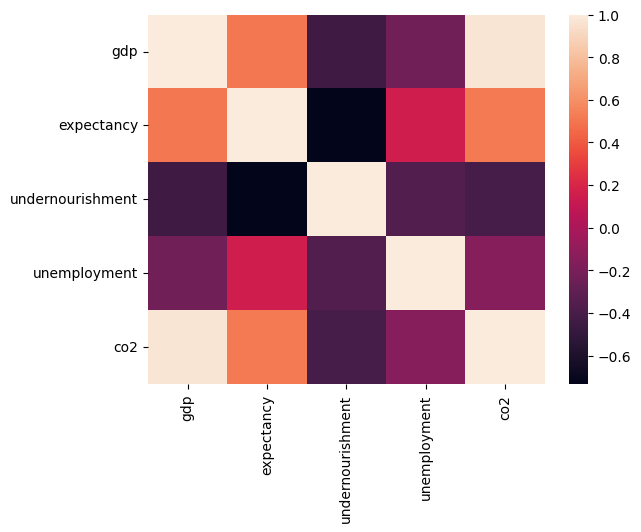

YR2003


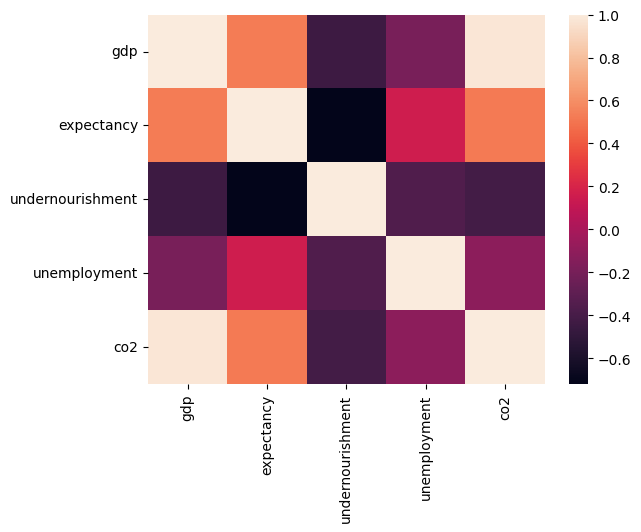

YR2004


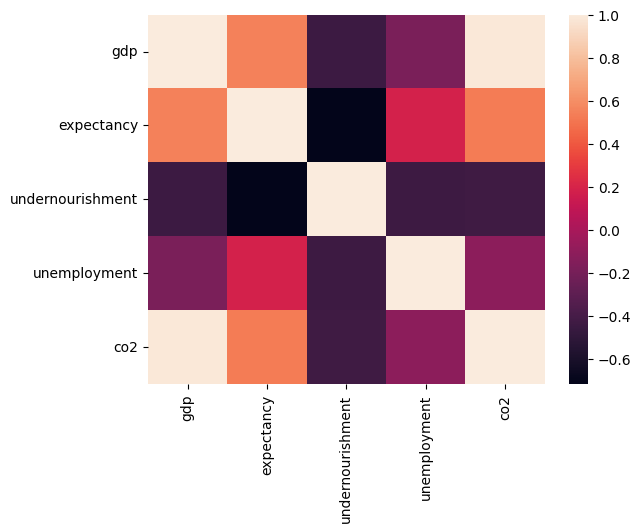

YR2005


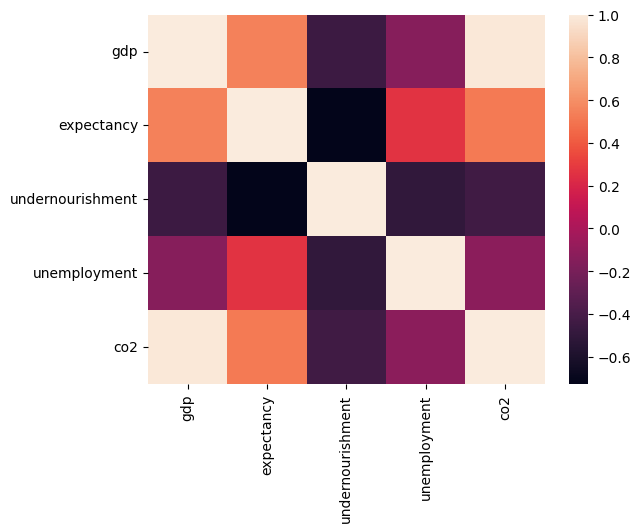

YR2006


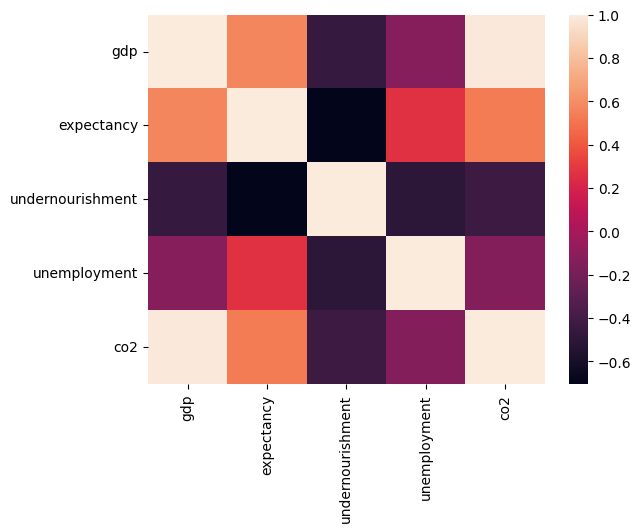

YR2007


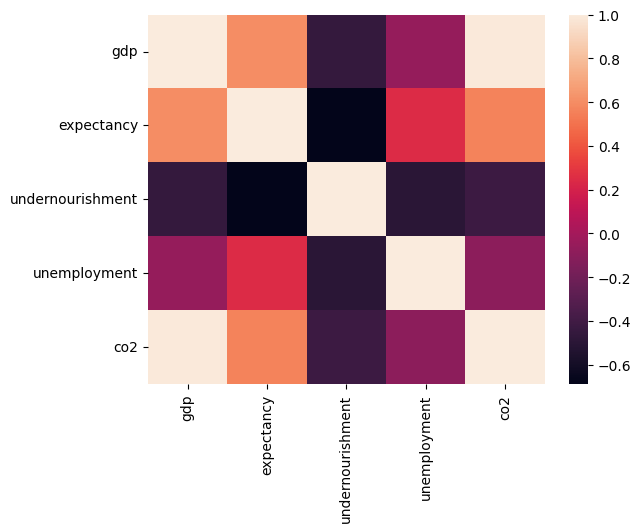

YR2008


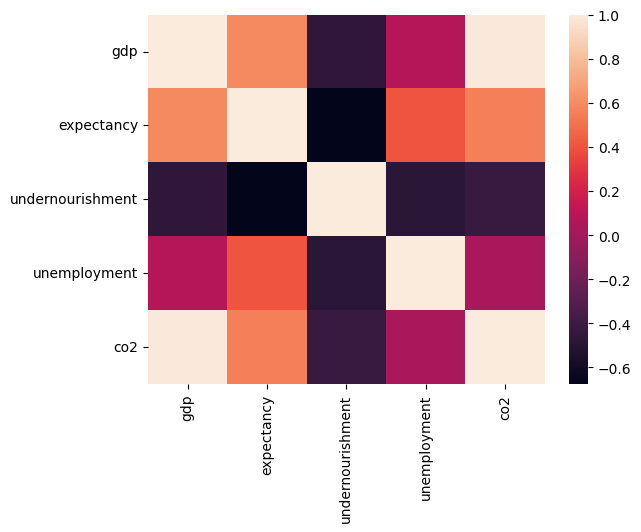

YR2009


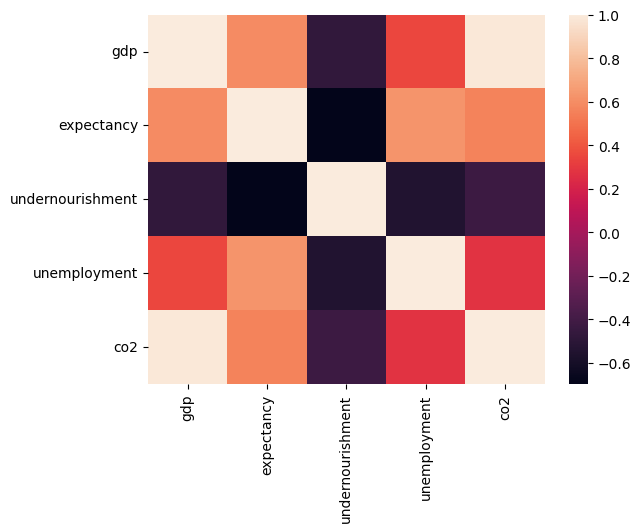

YR2010


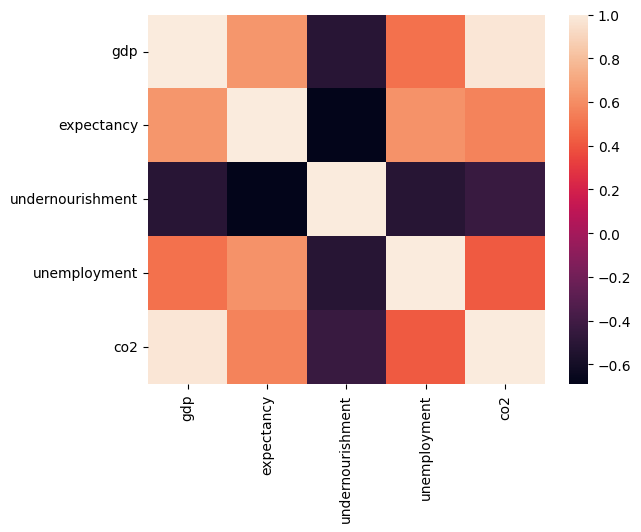

YR2011


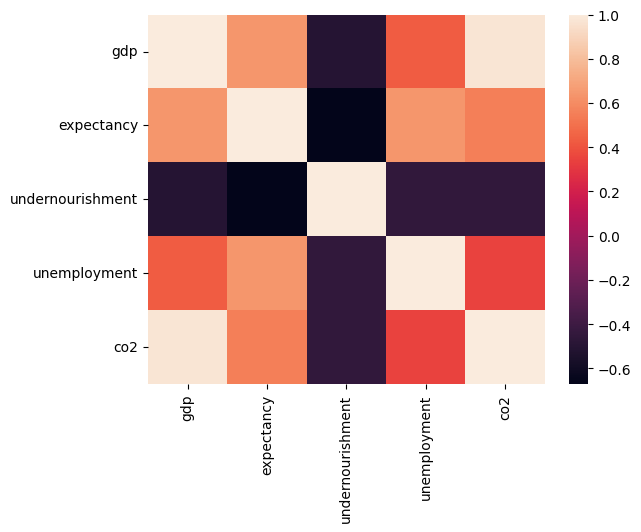

YR2012


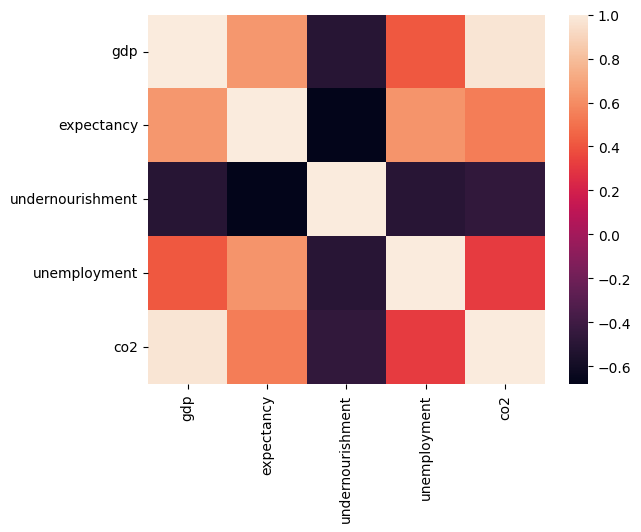

YR2013


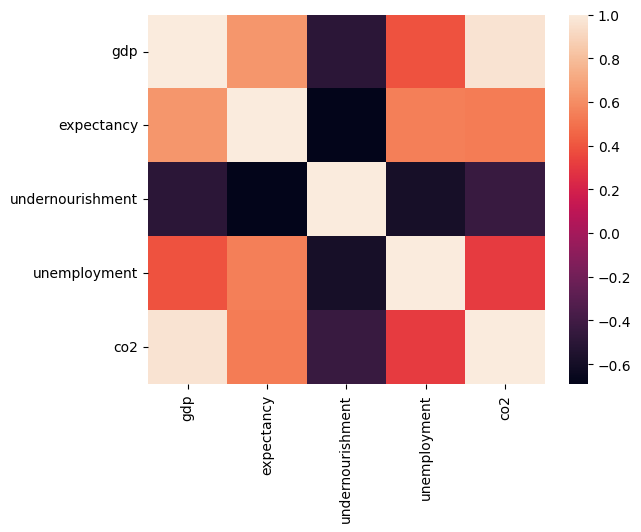

YR2014


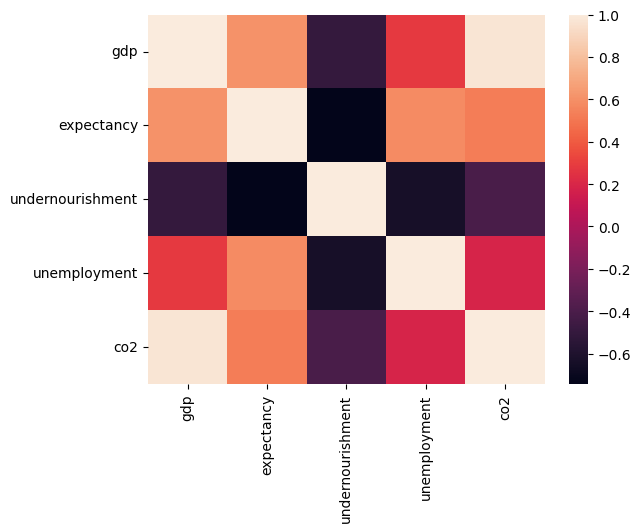

YR2015


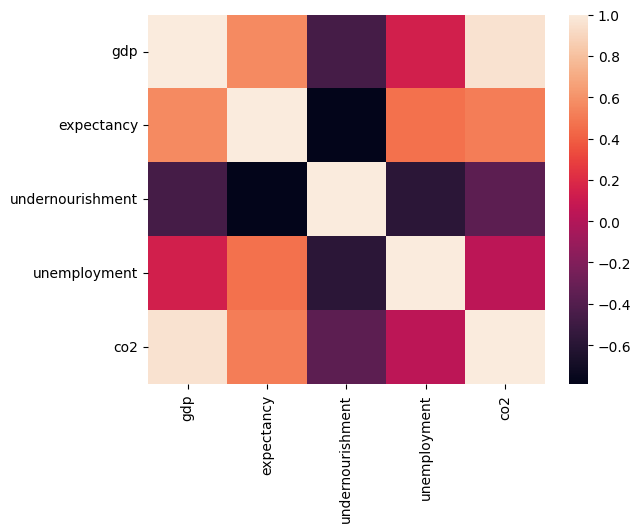

YR2016


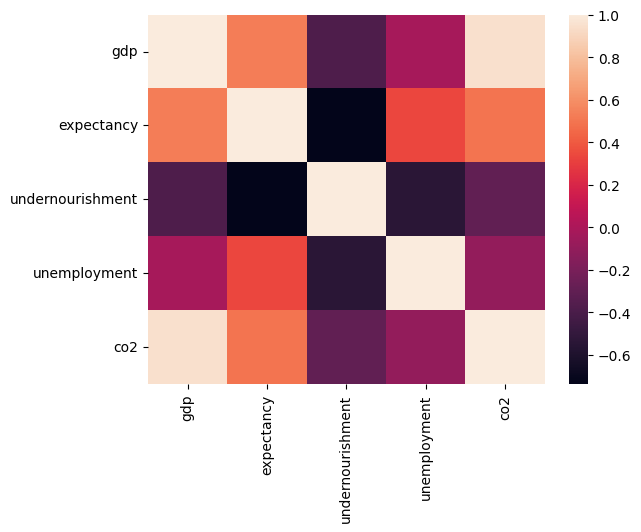

YR2017


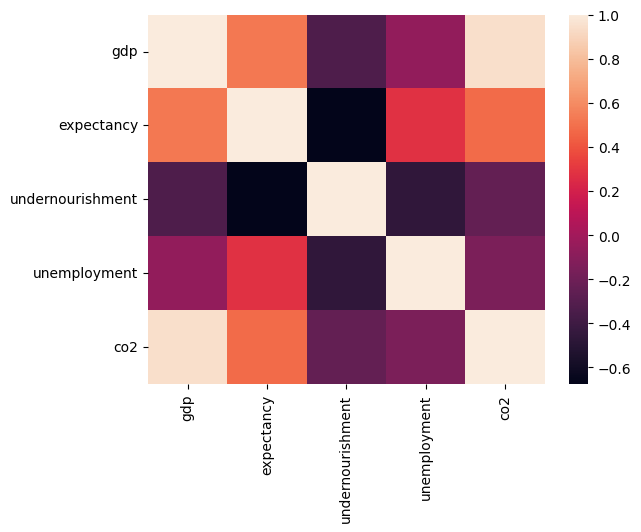

YR2018


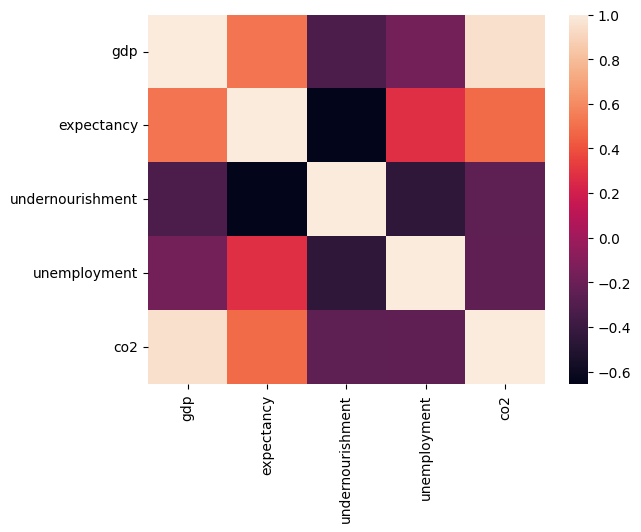

YR2019


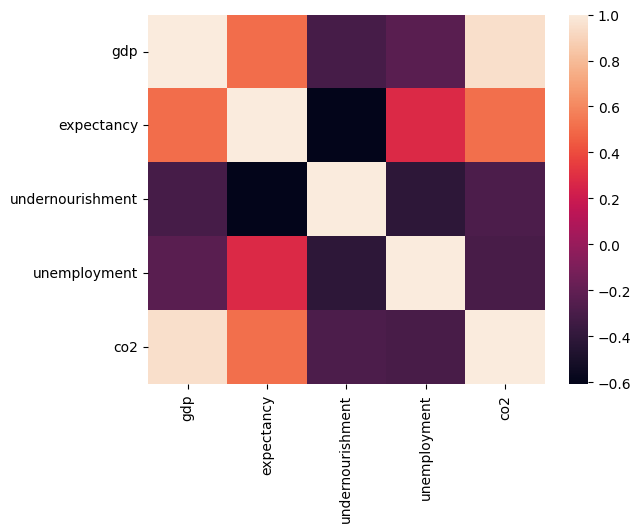

In [40]:
for year in DT ['Year'].unique():
  print(year)
  sns.heatmap(DT[DT['Year']==year].corr())
  plt.show ()

# EXPLORACIÓN GRÁFICA

In [41]:
DT.head(14)

,Year,Country,gdp,expectancy,undernourishment,unemployment,co2
0,YR2002,United States,37997.759657,76.936585,2.5,5.780,19.445530
1,YR2002,Canada,24255.338582,79.530732,2.5,7.660,16.720411
2,YR2002,Uruguay,4115.154614,75.540000,3.5,16.650,1.370235
3,YR2002,Chile,4479.175044,77.445000,3.2,10.170,3.129990
4,YR2002,Argentina,2579.488769,74.408000,3.8,19.590,3.100489
5,YR2002,Costa Rica,4021.425361,77.983000,5.0,6.330,1.339730
6,YR2002,Mexico,7650.931864,74.106000,3.7,3.000,3.824968
7,YR2002,Brazil,2824.715396,70.410000,9.3,10.640,1.760651
8,YR2002,Peru,2003.971081,71.661000,22.9,4.840,1.014505
9,YR2002,Ecuador,2184.209244,73.613000,22.7,4.899,1.849363


In [42]:
variables = ['gdp', 'undernourishment', 'expectancy', 'co2', 'unemployment']

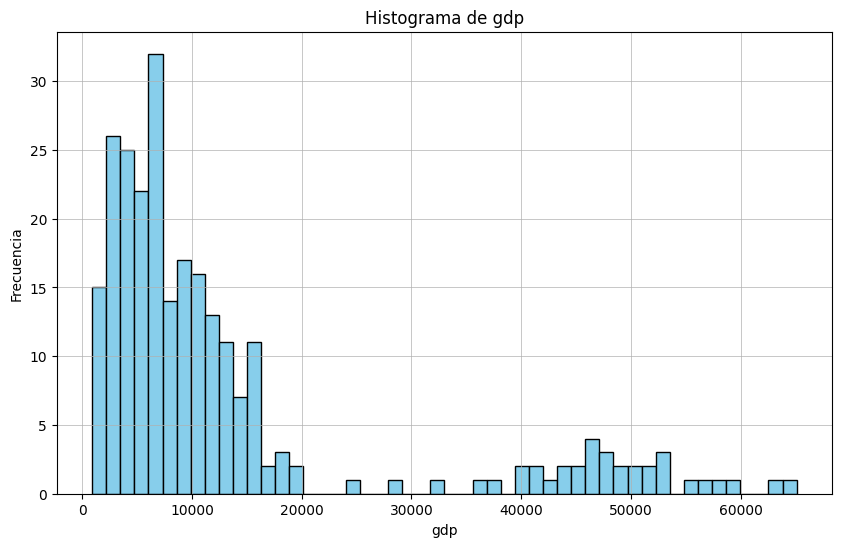

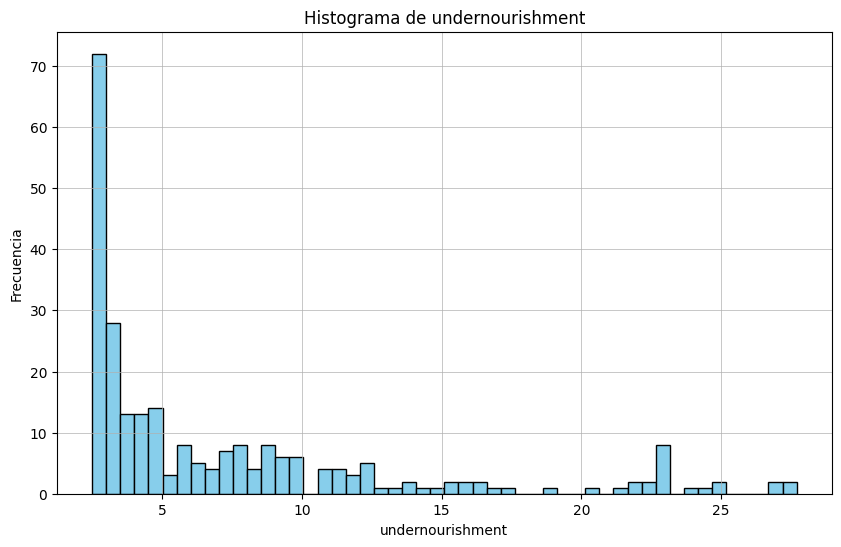

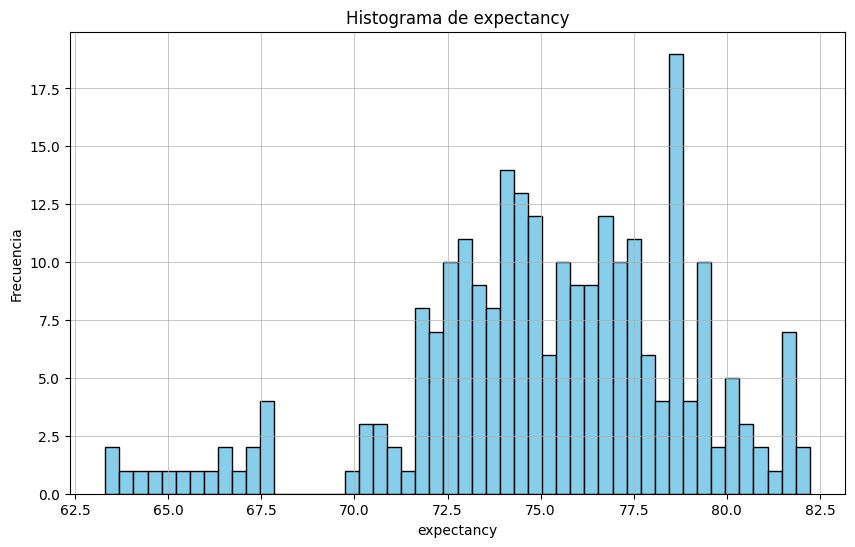

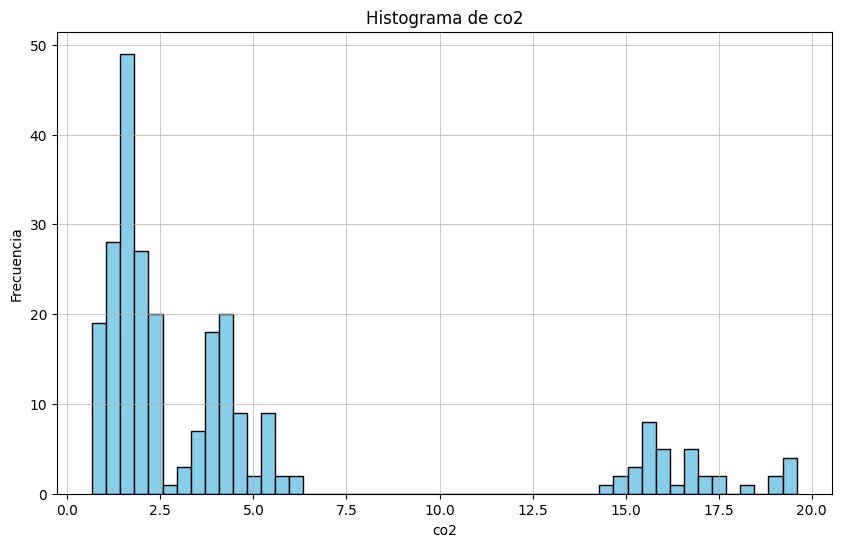

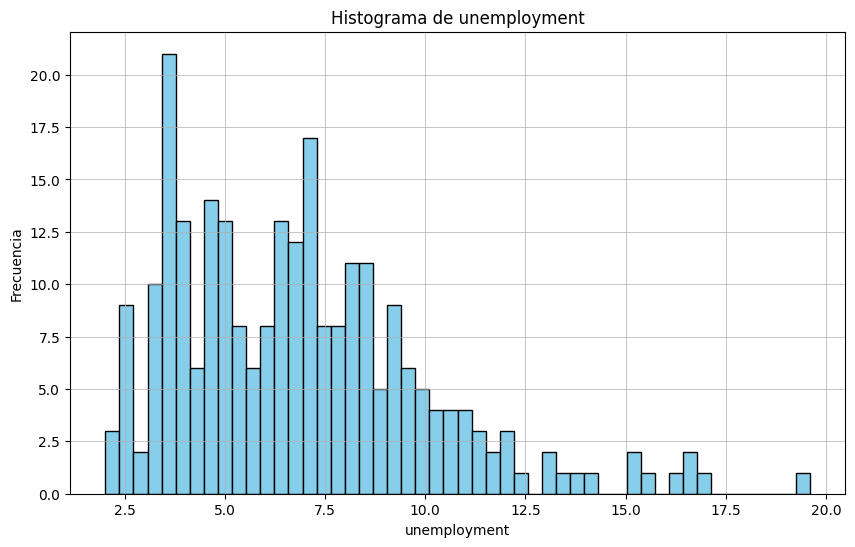

In [43]:
for variable in variables:
    plt.figure(figsize=(10, 6))
    DT[variable].hist(bins=50, color='skyblue', edgecolor='black')

    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de {variable}')
    plt.grid(linestyle='-', linewidth=0.5)
    plt.show()

In [44]:
#Determinamos dos variables por continente

south = DT[DT['Country'].isin(['Argentina', 'Uruguay', 'Chile', 'Peru', 'Brazil', 'Ecuador', 'Colombia', 'Paraguay', 'Bolivia', 'Venezuela, RB' ])]
north = DT[DT['Country'].isin(['Canada', 'United States', 'Costa Rica', 'Mexico'])]


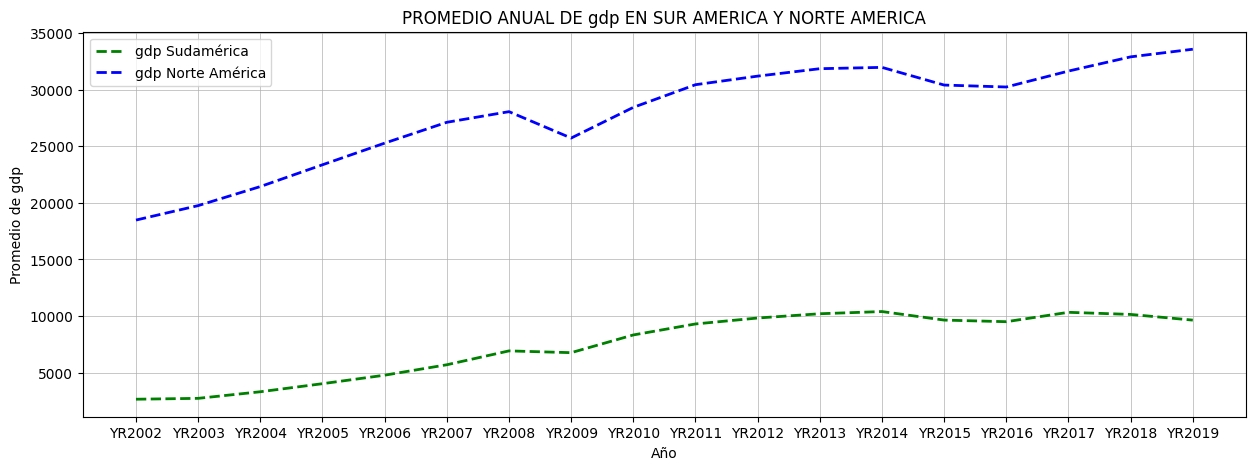

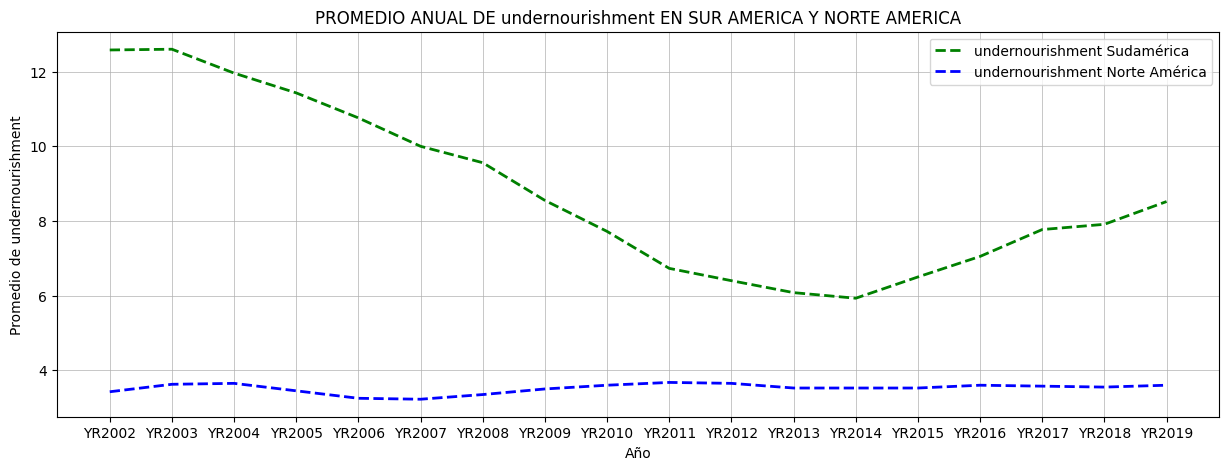

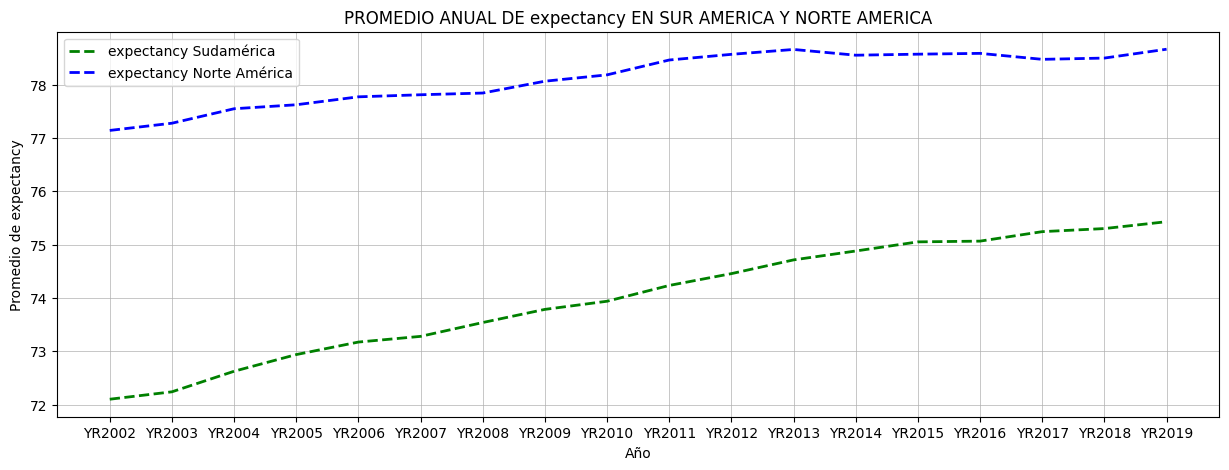

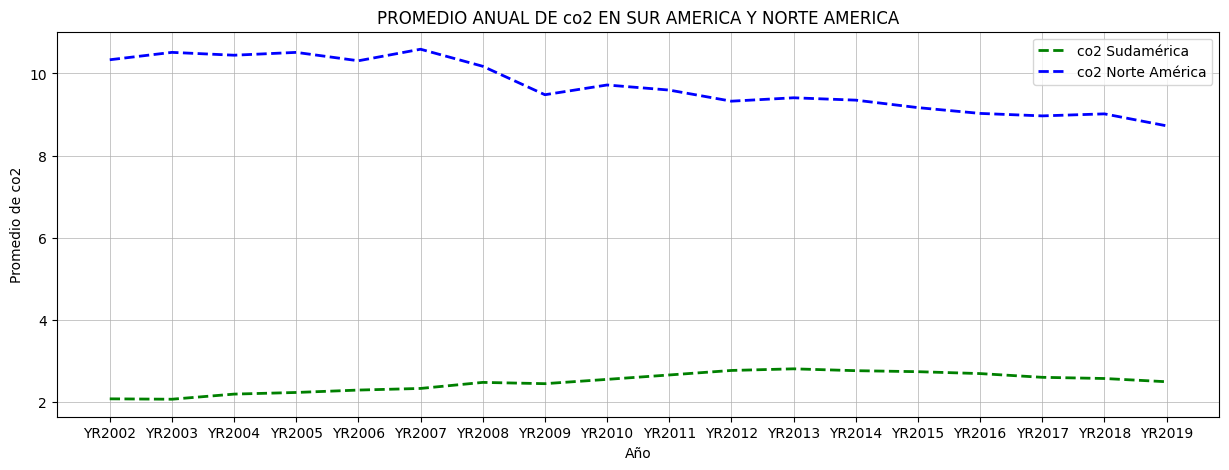

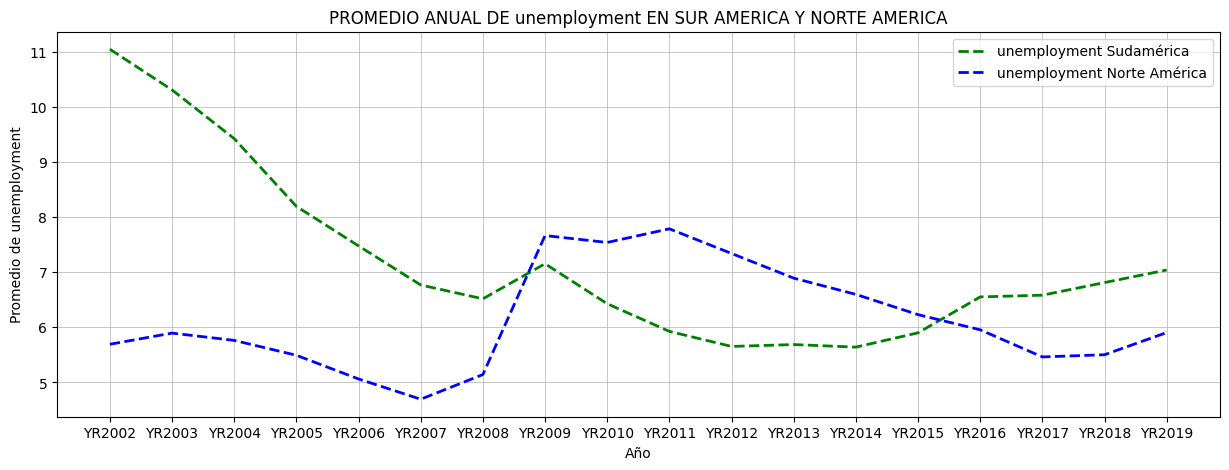

In [45]:
#bucle para calcular el promedio anual
for variable in variables:
  LS1 = south.groupby('Year')[[variable]].mean()
  LN1 = north.groupby('Year')[[variable]].mean()

# Creamos el grafico que muestre la relacion de la variable para el grupo de paises

  plt.figure(figsize=(15, 5))

  plt.plot(LS1.index, LS1[variable], label=f'{variable} Sudamérica', color='green', linewidth=2, linestyle='dashed')
  plt.plot(LN1.index, LN1[variable], label=f'{variable} Norte América', color='blue', linewidth=2, linestyle='dashed')

  plt.xlabel('Año')
  plt.ylabel(f'Promedio de {variable}')
  plt.title(f'PROMEDIO ANUAL DE {variable} EN SUR AMERICA Y NORTE AMERICA')
  plt.legend()
  plt.grid(linestyle='-', linewidth=0.5)
  plt.show()

In [46]:
gdp_und = px.scatter(DT, x="Year", y="undernourishment", size = 'gdp', color="Country", title= 'RELACIÓN POR PAÍS ENTRE EL GPD Y LA DESNUTRICIÓN POR AÑO')
gdp_und.show()

In [47]:
gdp_unem = px.scatter(DT, x="Year", y="unemployment", size = 'gdp' , color="Country", title= 'RELACIÓN POR PAÍS ENTRE EL GPD Y EL DESEMPLEO POR AÑO')
gdp_unem.show()

In [48]:
gdp_co2 = px.scatter(DT, x="Year", y="co2",size = 'gdp',  color="Country", title= 'RELACIÓN POR PAÍS EMTRE EL GPD Y EMISIÓN DE C02 POR AÑO')
gdp_co2.show()

# PRUEBAS DE HIPÓTESIS

Diferencias para cada una de las variables entre Colombia y Suramérica

In [49]:
variables = ['gdp', 'undernourishment', 'expectancy', 'co2', 'unemployment']

In [50]:
# Definimos la lista de países para Suramérica

south_countries = ['Argentina', 'Uruguay', 'Chile', 'Peru', 'Brazil', 'Ecuador', 'Paraguay', 'Bolivia', 'Venezuela', 'RB']

# Filtramos los datos para obtener las muestras de Colombia y Suramérica

colombia_data = DT[DT['Country'] == 'Colombia']
south_data = DT[DT['Country'].isin(south_countries)]

colombia_data = colombia_data[variables]
south_data = south_data[variables]

In [51]:
from scipy import stats

for variable in variables:

    # Realizamos la prueba de hipótesis (t-test)
    t_statistic, p_value = stats.ttest_ind(colombia_data[variable], south_data[variable])

    print(f"Variable: {variable}")
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print("La diferencia es estadísticamente significativa.\n")
    else:
        print("No hay evidencia suficiente para rechazar la hipótesis nula.\n")


Variable: gdp
T-statistic: -1.4620540166433804
P-value: 0.14568775374770065
No hay evidencia suficiente para rechazar la hipótesis nula.

Variable: undernourishment
T-statistic: 0.5449485526496459
P-value: 0.586547687123284
No hay evidencia suficiente para rechazar la hipótesis nula.

Variable: expectancy
T-statistic: 0.8379360182117015
P-value: 0.4033166206533627
No hay evidencia suficiente para rechazar la hipótesis nula.

Variable: co2
T-statistic: -2.7724306748858774
P-value: 0.006224543557519964
La diferencia es estadísticamente significativa.

Variable: unemployment
T-statistic: 5.027422384735115
P-value: 1.3195943915897367e-06
La diferencia es estadísticamente significativa.



Diferencias para cada una de las variables entre Colombia y Mexico

In [52]:
mexico_data = DT[DT['Country'] == 'Mexico']

mexico_data = mexico_data[variables]

In [53]:
for variable in variables:

    t_statistic, p_value = stats.ttest_ind(colombia_data[variable], mexico_data[variable])

    print(f"Variable: {variable}")
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print("La diferencia es estadísticamente significativa.\n")
    else:
        print("No hay evidencia suficiente para rechazar la hipótesis nula.\n")

Variable: gdp
T-statistic: -6.9877802755049165
P-value: 4.631752332444466e-08
La diferencia es estadísticamente significativa.

Variable: undernourishment
T-statistic: 8.034902691480909
P-value: 2.2960607573216153e-09
La diferencia es estadísticamente significativa.

Variable: expectancy
T-statistic: 1.3106805893173827
P-value: 0.19875043080115165
No hay evidencia suficiente para rechazar la hipótesis nula.

Variable: co2
T-statistic: -44.440417905923326
P-value: 1.0499544564206426e-31
La diferencia es estadísticamente significativa.

Variable: unemployment
T-statistic: 12.625139905978266
P-value: 2.1780074510269393e-14
La diferencia es estadísticamente significativa.



Diferencias para cada una de las variables entre Colombia y Estados Unidos

In [54]:
usa_data = DT[DT['Country'] == 'United States']

usa_data = usa_data[variables]

In [55]:
for variable in variables:

    t_statistic, p_value = stats.ttest_ind(colombia_data[variable], usa_data[variable])

    print(f"Variable: {variable}")
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print("La diferencia es estadísticamente significativa.\n")
    else:
        print("No hay evidencia suficiente para rechazar la hipótesis nula.\n")

Variable: gdp
T-statistic: -24.103149457013586
P-value: 5.880005262215648e-23
La diferencia es estadísticamente significativa.

Variable: undernourishment
T-statistic: 12.471400958920404
P-value: 3.074158347939321e-14
La diferencia es estadísticamente significativa.

Variable: expectancy
T-statistic: -8.286034894156682
P-value: 1.1376349992624354e-09
La diferencia es estadísticamente significativa.

Variable: co2
T-statistic: -36.19479304520324
P-value: 9.778372841360123e-29
La diferencia es estadísticamente significativa.

Variable: unemployment
T-statistic: 7.0585447884357215
P-value: 3.767405424832646e-08
La diferencia es estadísticamente significativa.



/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.



Diferencias para cada una de las variables entre Colombia y Canada

In [56]:
canada_data = DT[DT['Country'] == 'Canada']

canada_data = canada_data[variables]

In [57]:
for variable in variables:

    t_statistic, p_value = stats.ttest_ind(colombia_data[variable], canada_data[variable])

    print(f"Variable: {variable}")
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print("La diferencia es estadísticamente significativa.\n")
    else:
        print("No hay evidencia suficiente para rechazar la hipótesis nula.\n")

Variable: gdp
T-statistic: -18.845869035251805
P-value: 1.427398853790031e-19
La diferencia es estadísticamente significativa.

Variable: undernourishment
T-statistic: 12.471400958920404
P-value: 3.074158347939321e-14
La diferencia es estadísticamente significativa.

Variable: expectancy
T-statistic: -14.6127604730948
P-value: 3.210525801851943e-16
La diferencia es estadísticamente significativa.

Variable: co2
T-statistic: -88.4024036751822
P-value: 9.061707804601084e-42
La diferencia es estadísticamente significativa.

Variable: unemployment
T-statistic: 7.207014839128617
P-value: 2.4462300593628817e-08
La diferencia es estadísticamente significativa.



/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.



Diferencias para cada una de las variables entre Colombia y Costa Rica

In [58]:
cr_data = DT[DT['Country'] == 'Costa Rica']

cr_data = cr_data[variables]

In [59]:
for variable in variables:

    t_statistic, p_value = stats.ttest_ind(colombia_data[variable], cr_data[variable])

    print(f"Variable: {variable}")
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print("La diferencia es estadísticamente significativa.\n")
    else:
        print("No hay evidencia suficiente para rechazar la hipótesis nula.\n")

Variable: gdp
T-statistic: -3.20515258298909
P-value: 0.0029335036288989143
La diferencia es estadísticamente significativa.

Variable: undernourishment
T-statistic: 8.921672172554729
P-value: 1.991504386435444e-10
La diferencia es estadísticamente significativa.

Variable: expectancy
T-statistic: -10.087155375971246
P-value: 9.3366113893408e-12
La diferencia es estadísticamente significativa.

Variable: co2
T-statistic: -1.0288032906398668
P-value: 0.310835795016641
No hay evidencia suficiente para rechazar la hipótesis nula.

Variable: unemployment
T-statistic: 5.046481194398147
P-value: 1.4952550664330314e-05
La diferencia es estadísticamente significativa.

